In [8]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Flatten, Input , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential,Model

In [9]:
image_size=[100,100]
model=InceptionV3(input_shape=image_size+[3],include_top=False, weights='imagenet')


In [10]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 49, 49, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 49, 49, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 49, 49, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [19]:
for layers in model.layers:
  layers.trainable=False

In [20]:
model.output

<KerasTensor: shape=(None, 1, 1, 2048) dtype=float32 (created by layer 'mixed10')>

In [21]:
x=(Flatten()(model.output))

In [28]:
x=Dense(1025,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(2,activation='softmax')(x)
final_model=Model(inputs=model.input,outputs=x)

In [29]:
final_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 49, 49, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 49, 49, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 49, 49, 32)   0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
train_path="/content/drive/MyDrive/CollabNotebooks/training_set/training_set"
test_path="/content/drive/MyDrive/CollabNotebooks/test_set/test_set"

In [31]:
train_augmen=ImageDataGenerator(rescale=1./255,shear_range=0.3,zoom_range=0.2,horizontal_flip=True)
test_augmen=ImageDataGenerator(rescale=1./255)

In [25]:
final_train=train_augmen.flow_from_directory(train_path,target_size=(100,100),batch_size=35,class_mode='categorical')
final_test=train_augmen.flow_from_directory(test_path,target_size=(100,100),batch_size=35,class_mode='categorical')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [36]:
l=len(final_test)

In [37]:
final_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [35]:
Inception=final_model.fit_generator(final_train,epochs=1,steps_per_epoch=15,validation_data=final_test,validation_steps=l)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


15/15 [==============================] - 397s 28s/step - loss: 1.1492 - accuracy: 0.6429 - val_loss: 0.4687 - val_accuracy: 0.7998


In [43]:
#we Trained our model using Adam as optimizer and Binary_crossentropy as loss
#we saw that we aren't getting much accuracy
#Thus we will try to change the optimizer to RMSprop and Loss to Categorical Crossentropy

In [40]:
from tensorflow.keras.optimizers import RMSprop
final_model.compile(optimizer=RMSprop(lr=0.0001),loss="categorical_crossentropy",metrics=['accuracy'])

In [44]:
Inception_RMS=final_model.fit_generator(final_train,epochs=10,steps_per_epoch=15,validation_data=final_test,validation_steps=l)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
15/15 [==============================] - 111s 8s/step - loss: 0.5193 - accuracy: 0.7886 - val_loss: 0.4339 - val_accuracy: 0.8161
Epoch 2/10
15/15 [==============================] - 108s 7s/step - loss: 0.4741 - accuracy: 0.8210 - val_loss: 0.4145 - val_accuracy: 0.8092
Epoch 3/10
15/15 [==============================] - 99s 7s/step - loss: 0.4156 - accuracy: 0.8190 - val_loss: 0.4267 - val_accuracy: 0.8038
Epoch 4/10
15/15 [==============================] - 98s 7s/step - loss: 0.3991 - accuracy: 0.8286 - val_loss: 0.4035 - val_accuracy: 0.8186
Epoch 5/10
15/15 [==============================] - 91s 6s/step - loss: 0.3898 - accuracy: 0.8190 - val_loss: 0.4066 - val_accuracy: 0.8077
Epoch 6/10
15/15 [==============================] - 88s 6s/step - loss: 0.4280 - accuracy: 0.8114 - val_loss: 0.3900 - val_accuracy: 0.8176
Epoch 7/10
15/15 [==============================] - 87s 6s/step - loss: 0.3558 - accuracy: 0.8343 - val_loss: 0.3643 - val_accuracy: 0.8349
Epoch 8/10
15/15 [

In [45]:
final_model.save('/content/drive/MyDrive/CollabNotebooks/Inception_V2_model.h5')
#Saving our model file

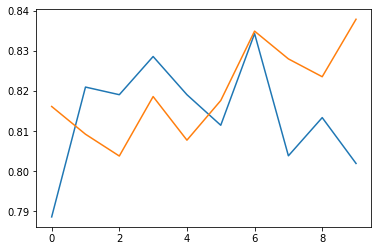

In [47]:
#Evaluating our model accuracy
import matplotlib.pyplot as plt
plt.plot(Inception_RMS.history['accuracy'])
plt.plot(Inception_RMS.history['val_accuracy'])
plt.show()

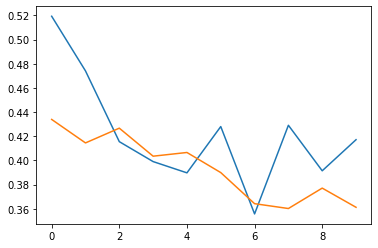

In [48]:
import matplotlib.pyplot as plt
plt.plot(Inception_RMS.history['loss'])
plt.plot(Inception_RMS.history['val_loss'])
plt.show()

In [49]:
import numpy as np
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/drive/MyDrive/CollabNotebooks/test_set/test_set/dogs/dog.4001.jpg',target_size=(100,100))


In [50]:
image_array=image.img_to_array(img)
image_array=np.expand_dims(image_array/255,axis=0)
final_model.predict(image_array)

array([[0.08649553, 0.9135044 ]], dtype=float32)

In [ ]:
#We had 2 folders in our drive,First is cat and other is dog.
#We passed the image of dog and our model predicted 91%-dog